In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [2]:
df = pd.read_csv('Clean_Dataset.csv')

In [3]:
print(df.head())

   Unnamed: 0   airline   flight source_city departure_time stops  \
0           0  SpiceJet  SG-8709       Delhi        Evening  zero   
1           1  SpiceJet  SG-8157       Delhi  Early_Morning  zero   
2           2   AirAsia   I5-764       Delhi  Early_Morning  zero   
3           3   Vistara   UK-995       Delhi        Morning  zero   
4           4   Vistara   UK-963       Delhi        Morning  zero   

    arrival_time destination_city    class  duration  days_left  price  
0          Night           Mumbai  Economy      2.17          1   5953  
1        Morning           Mumbai  Economy      2.33          1   5953  
2  Early_Morning           Mumbai  Economy      2.17          1   5956  
3      Afternoon           Mumbai  Economy      2.25          1   5955  
4        Morning           Mumbai  Economy      2.33          1   5955  


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        300153 non-null  int64  
 1   airline           300153 non-null  object 
 2   flight            300153 non-null  object 
 3   source_city       300153 non-null  object 
 4   departure_time    300153 non-null  object 
 5   stops             300153 non-null  object 
 6   arrival_time      300153 non-null  object 
 7   destination_city  300153 non-null  object 
 8   class             300153 non-null  object 
 9   duration          300153 non-null  float64
 10  days_left         300153 non-null  int64  
 11  price             300153 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 27.5+ MB


In [5]:
print(df.describe())

          Unnamed: 0       duration      days_left          price
count  300153.000000  300153.000000  300153.000000  300153.000000
mean   150076.000000      12.221021      26.004751   20889.660523
std     86646.852011       7.191997      13.561004   22697.767366
min         0.000000       0.830000       1.000000    1105.000000
25%     75038.000000       6.830000      15.000000    4783.000000
50%    150076.000000      11.250000      26.000000    7425.000000
75%    225114.000000      16.170000      38.000000   42521.000000
max    300152.000000      49.830000      49.000000  123071.000000


In [6]:
print(df.isnull().sum())

Unnamed: 0          0
airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64


In [7]:
if 'Unnamed: 0' in df.columns:
    df = df.drop('Unnamed: 0', axis=1)
    print("\n'Unnamed: 0' column dropped.")


'Unnamed: 0' column dropped.


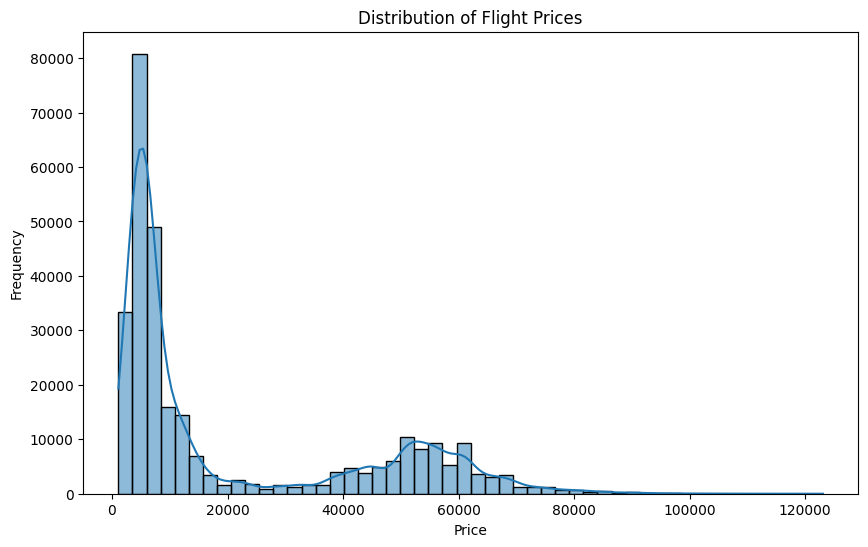

In [8]:
plt.figure(figsize=(10, 6))
sns.histplot(df['price'], kde=True, bins=50)
plt.title('Distribution of Flight Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

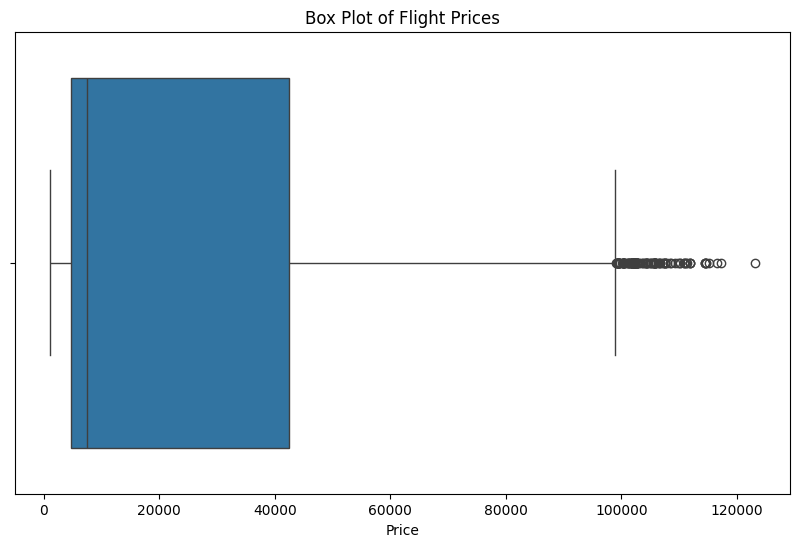

In [9]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['price'])
plt.title('Box Plot of Flight Prices')
plt.xlabel('Price')
plt.show()

In [10]:
categorical_features = ['airline', 'source', 'destination', 'stops', 'class', 'departure_time', 'arrival_time']

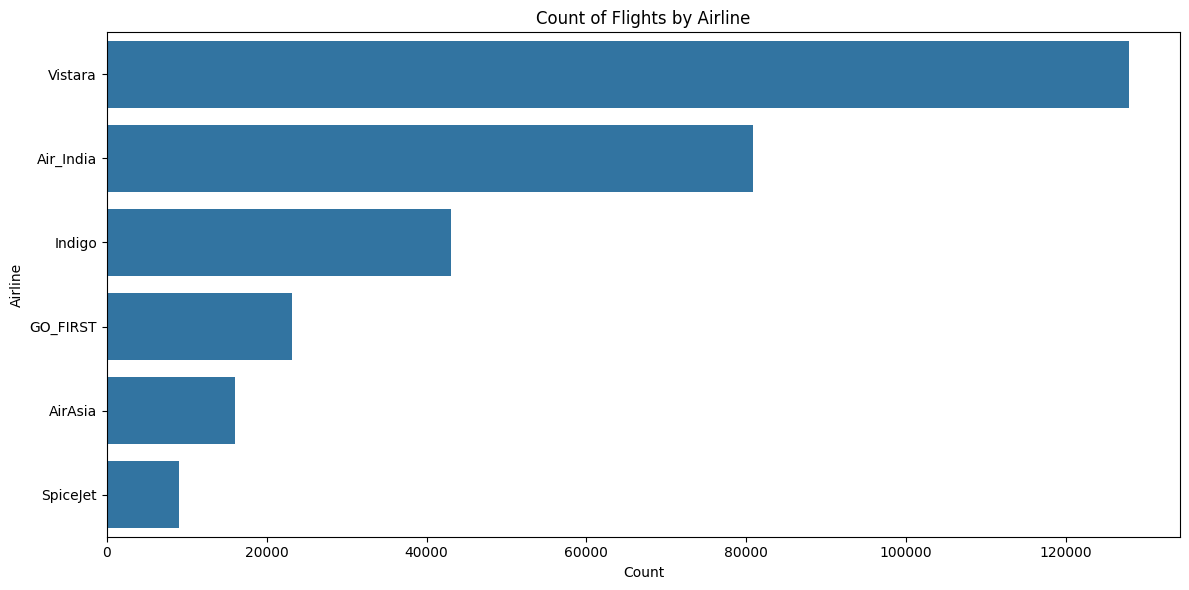

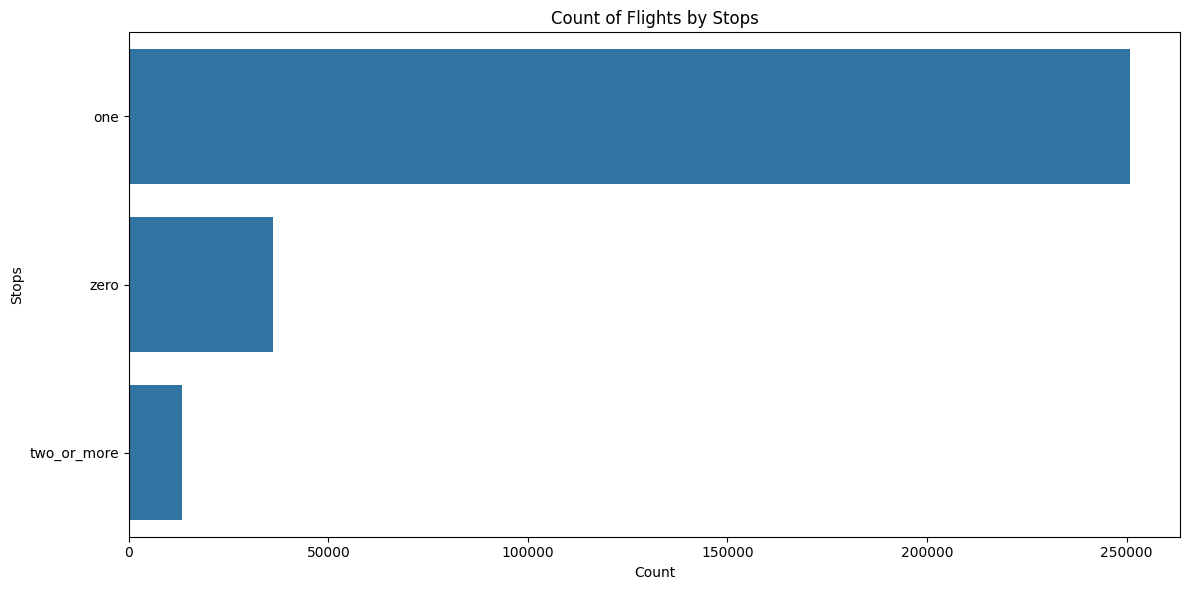

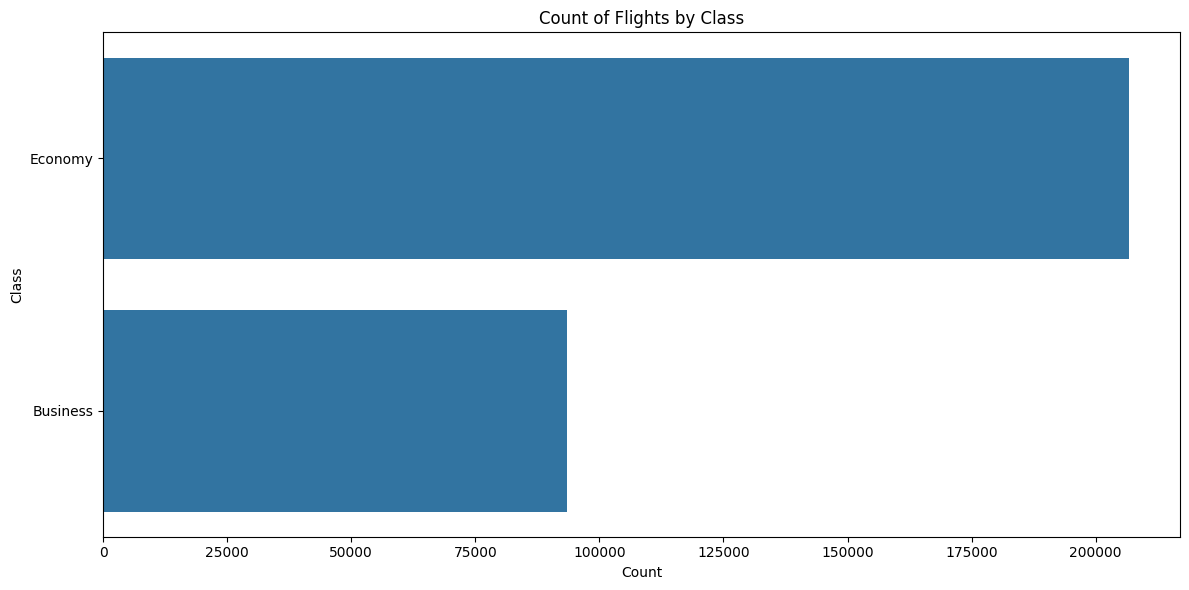

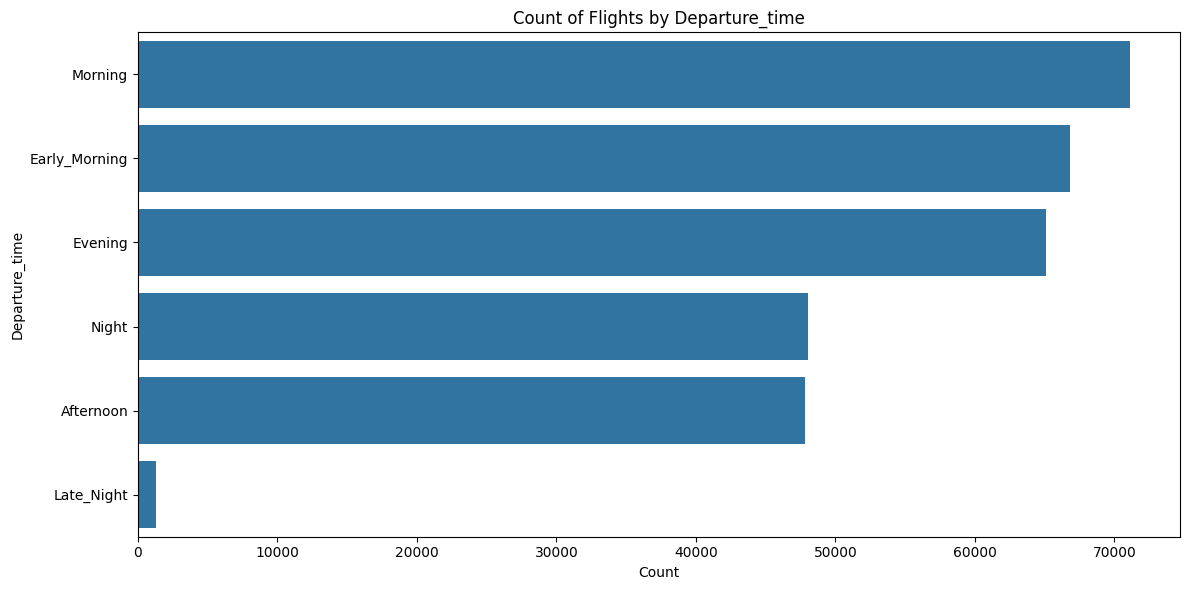

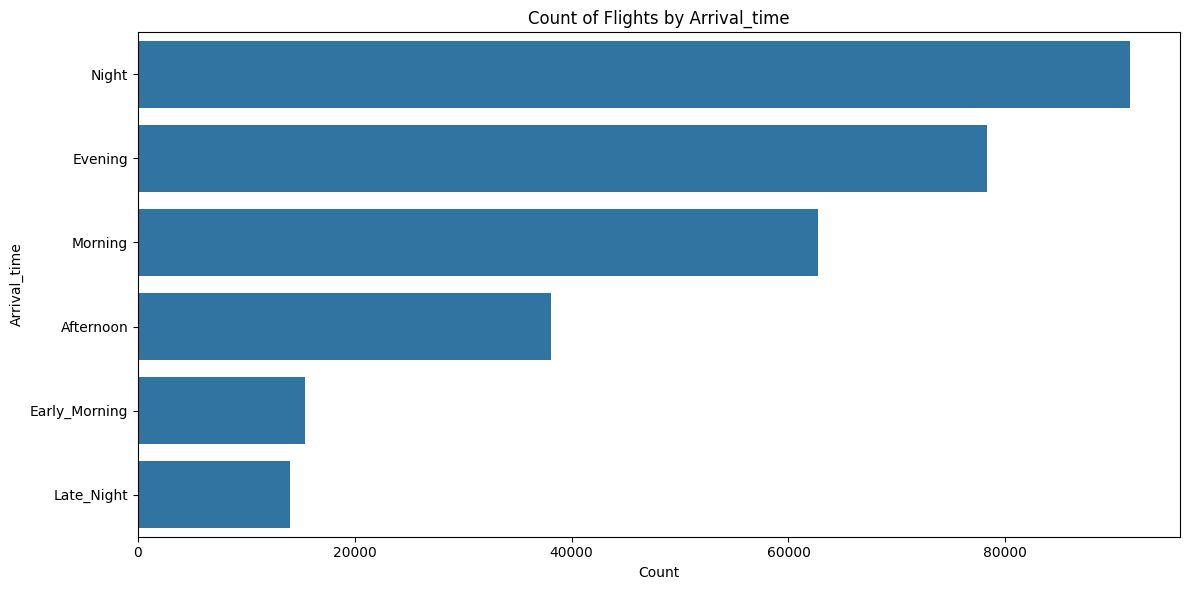

In [12]:
for col in categorical_features:
    if col in df.columns: 
        plt.figure(figsize=(12, 6))
        sns.countplot(y=df[col], order = df[col].value_counts().index)
        plt.title(f'Count of Flights by {col.capitalize()}')
        plt.xlabel('Count')
        plt.ylabel(col.capitalize())
        plt.tight_layout()
        plt.show()

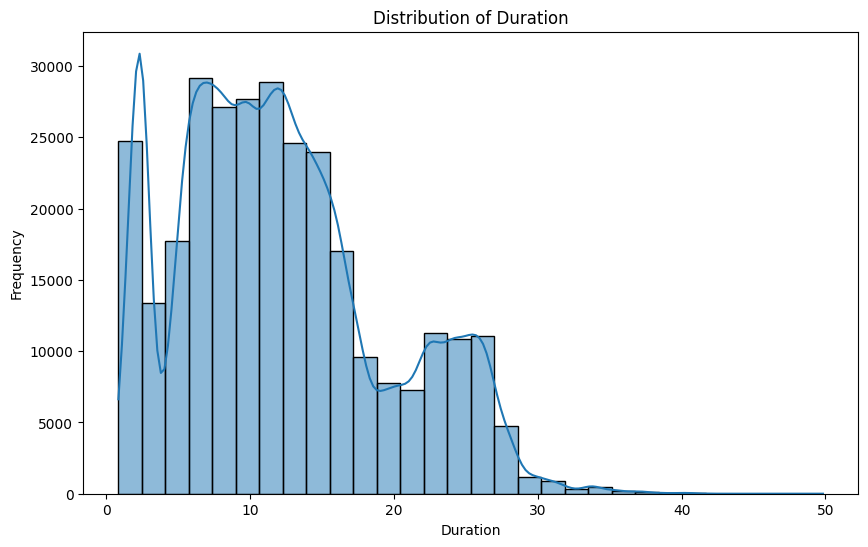

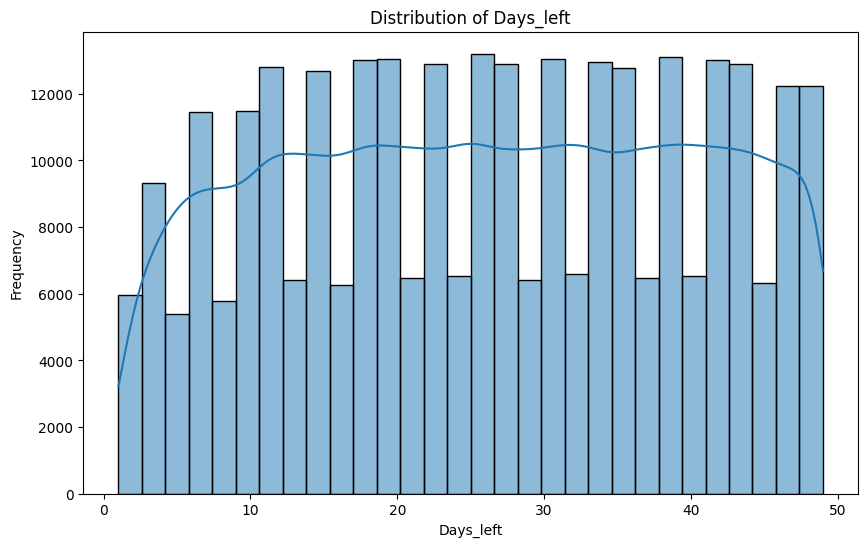

In [13]:
numerical_features = ['duration', 'days_left']

for col in numerical_features:
    if col in df.columns: 
        plt.figure(figsize=(10, 6))
        sns.histplot(df[col], kde=True, bins=30)
        plt.title(f'Distribution of {col.capitalize()}')
        plt.xlabel(col.capitalize())
        plt.ylabel('Frequency')
        plt.show()

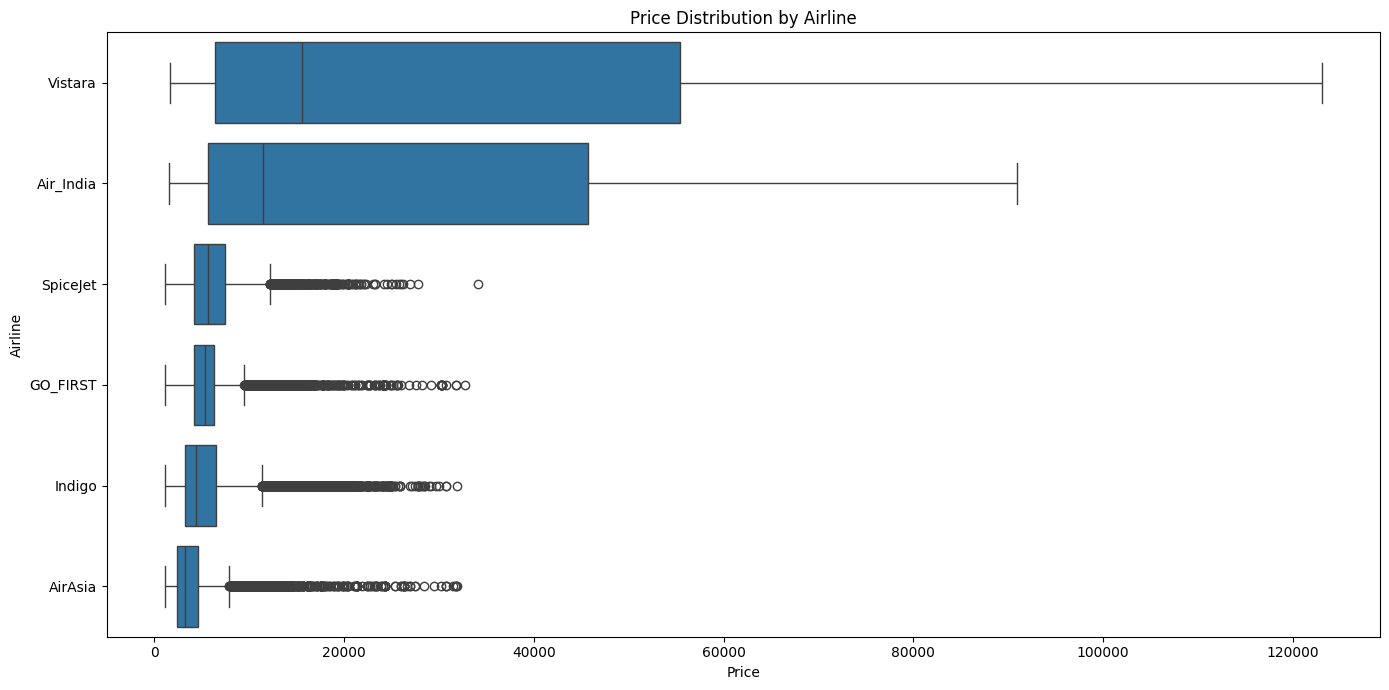

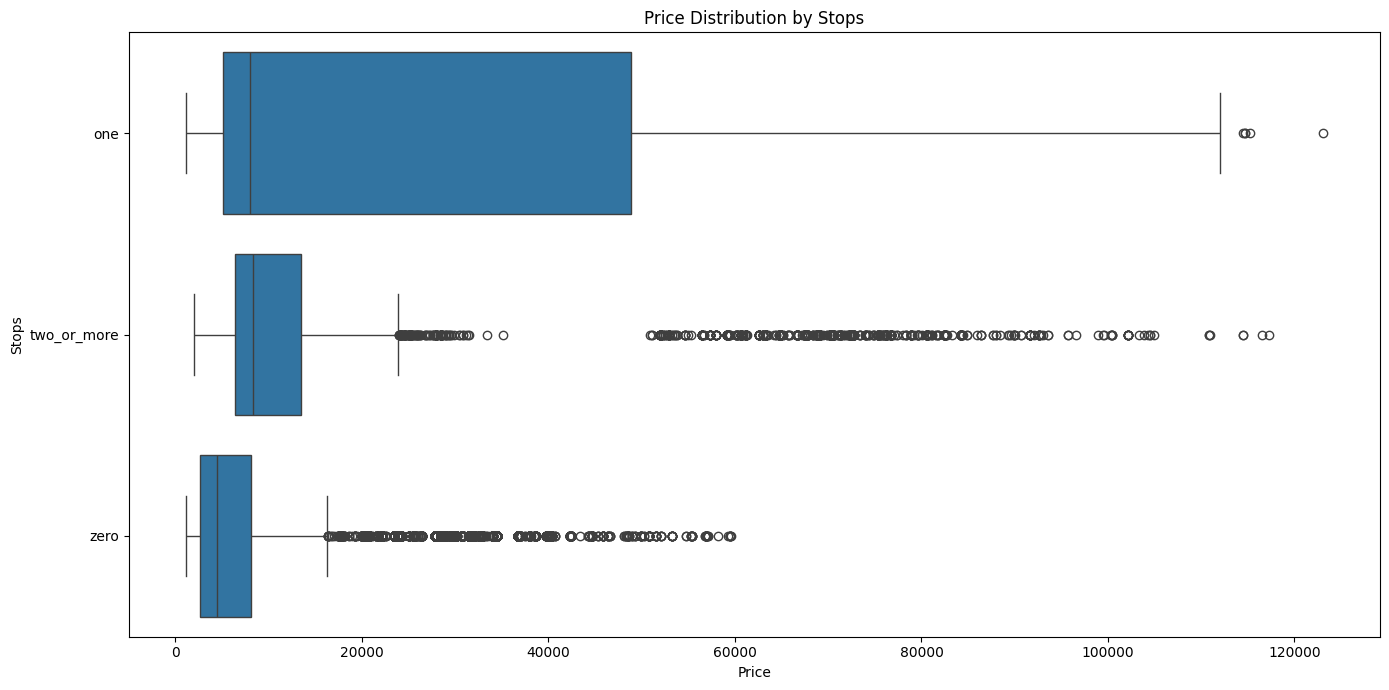

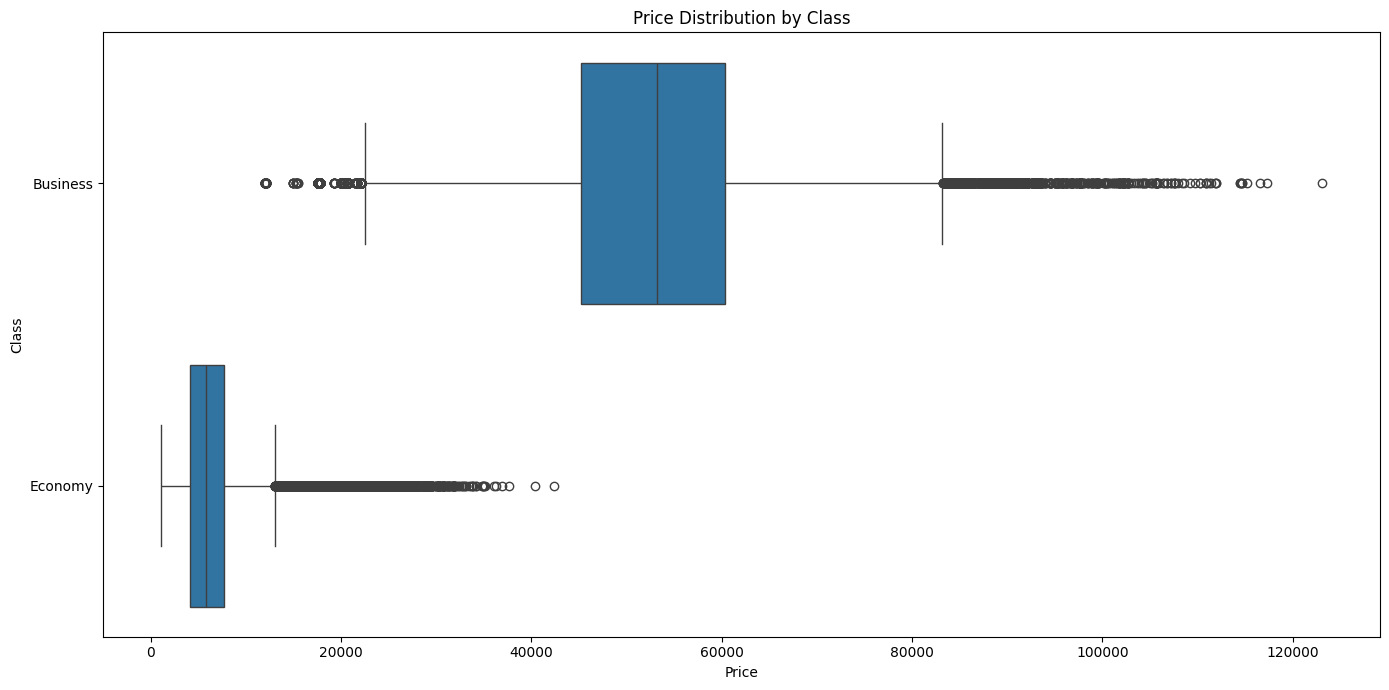

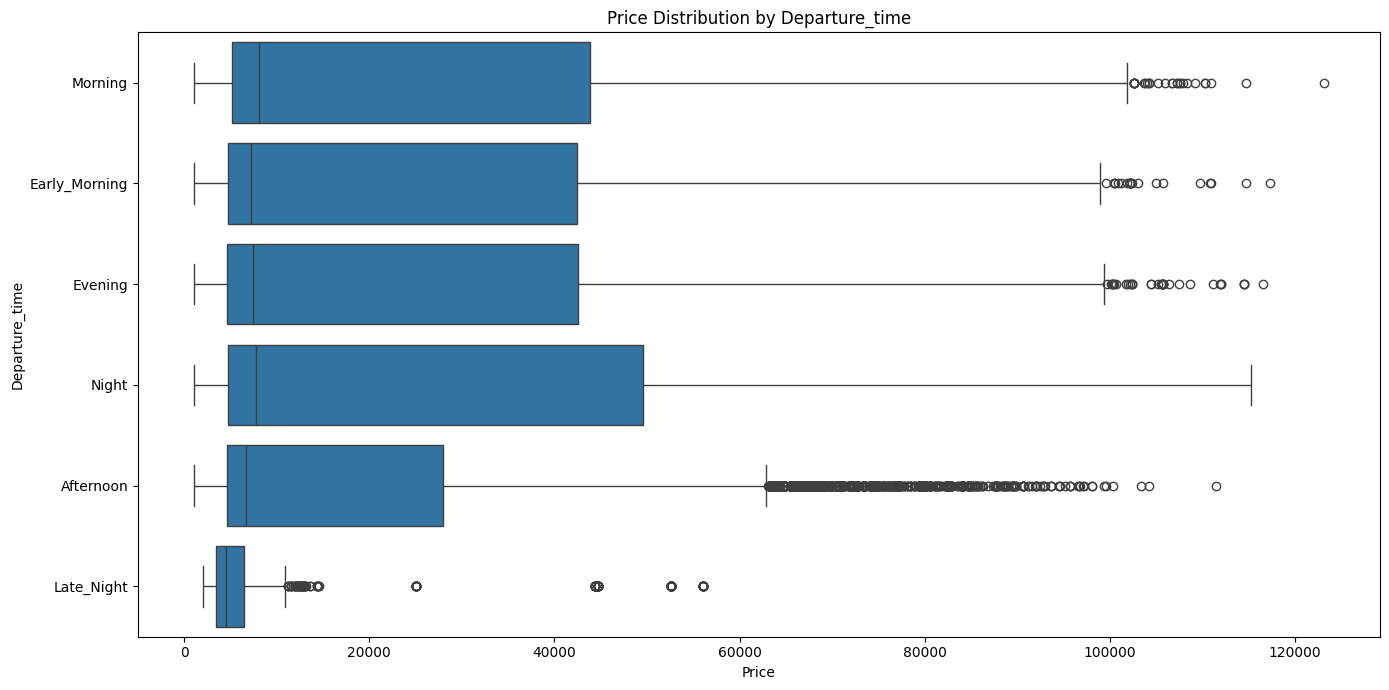

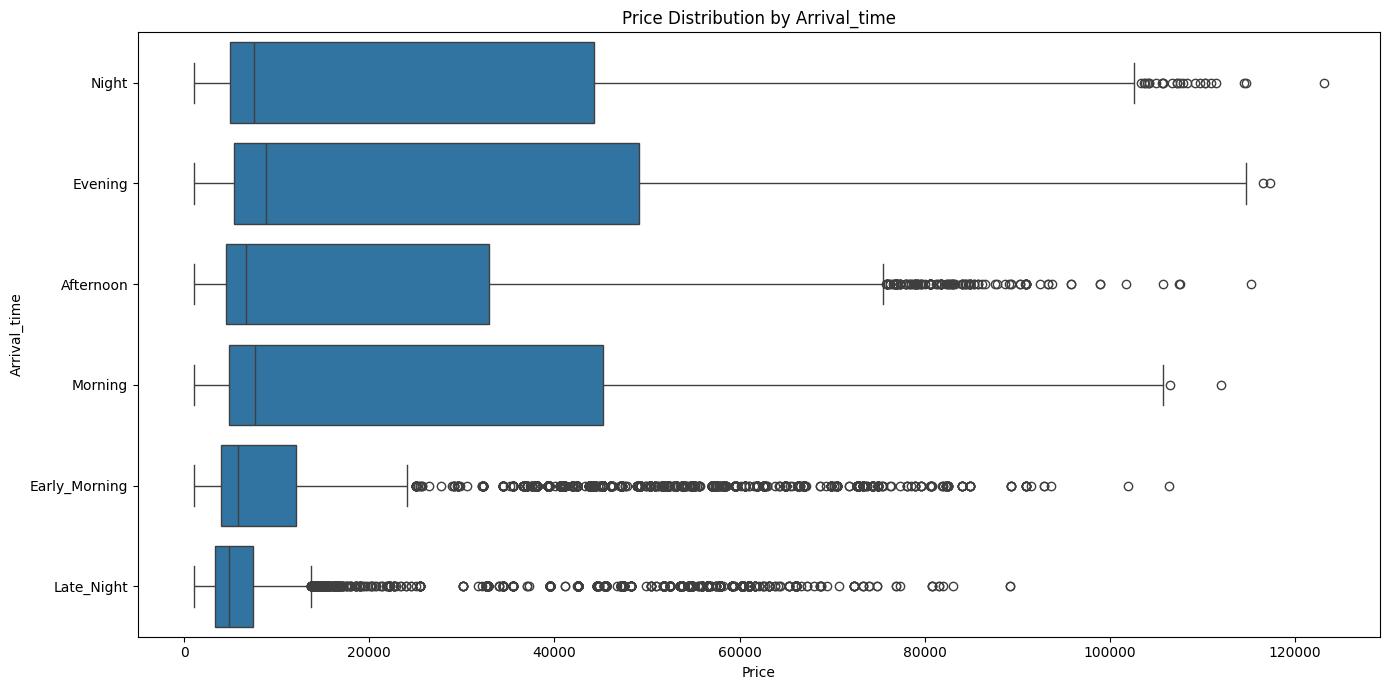

In [14]:
for col in categorical_features:
    if col in df.columns and 'price' in df.columns: 
        plt.figure(figsize=(14, 7))
        sns.boxplot(y=col, x='price', data=df.sort_values('price', ascending=False))
        plt.title(f'Price Distribution by {col.capitalize()}')
        plt.xlabel('Price')
        plt.ylabel(col.capitalize())
        plt.tight_layout()
        plt.show()

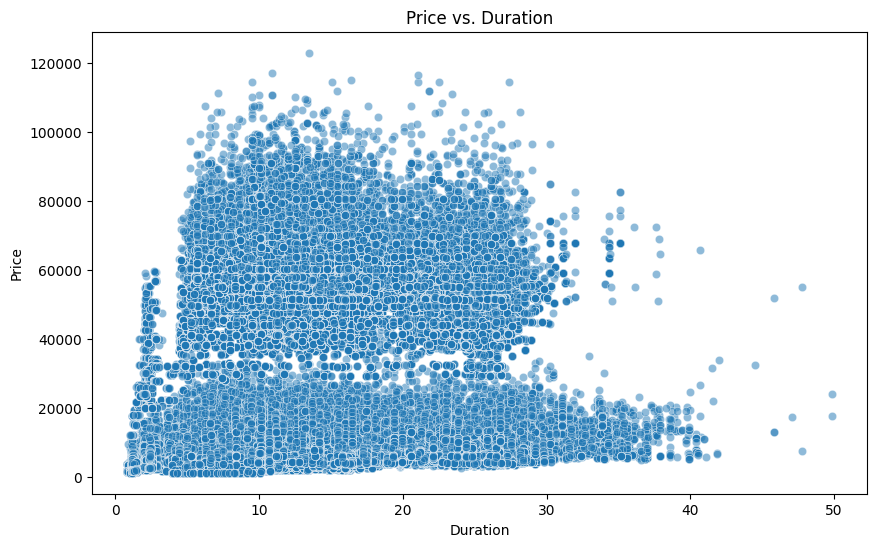

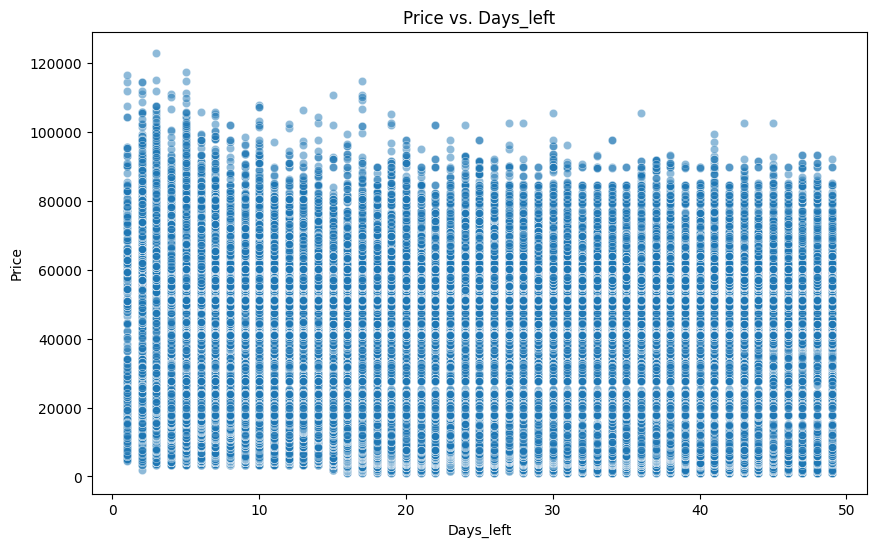

In [15]:
for col in numerical_features:
     if col in df.columns and 'price' in df.columns: 
        plt.figure(figsize=(10, 6))
        sns.scatterplot(x=col, y='price', data=df, alpha=0.5)
        plt.title(f'Price vs. {col.capitalize()}')
        plt.xlabel(col.capitalize())
        plt.ylabel('Price')
        plt.show()

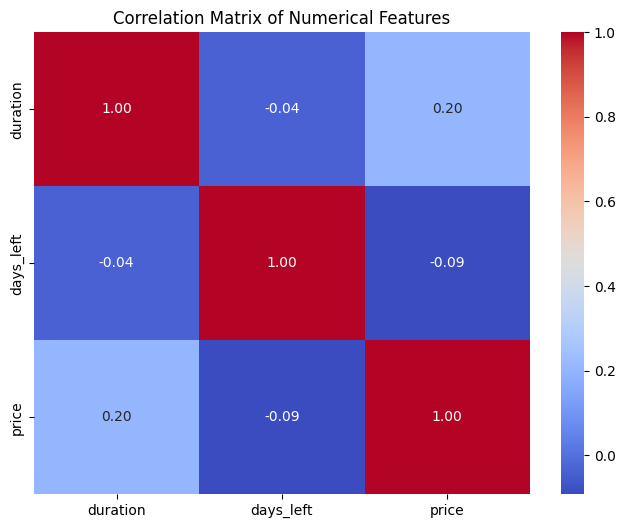

In [16]:
numerical_cols_corr = ['duration', 'days_left', 'price']
existing_cols_corr = [col for col in numerical_cols_corr if col in df.columns] 

if len(existing_cols_corr) > 1:
    correlation_matrix = df[existing_cols_corr].corr()
    plt.figure(figsize=(8, 6))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title('Correlation Matrix of Numerical Features')
    plt.show()

In [17]:
df_processed = df.copy()

if 'flight' in df_processed.columns:
    df_processed = df_processed.drop('flight', axis=1)
    print("\n'flight' column dropped.")
else:
    print("\n'flight' column not found for dropping.")


'flight' column dropped.


In [18]:
X = df_processed.drop('price', axis=1)
y = df_processed['price']

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
categorical_cols = X.select_dtypes(include='object').columns
numerical_cols = X.select_dtypes(include=np.number).columns

print("\nCategorical columns identified for preprocessing:", categorical_cols.tolist())
print("Numerical columns identified for preprocessing:", numerical_cols.tolist())


Categorical columns identified for preprocessing: ['airline', 'source_city', 'departure_time', 'stops', 'arrival_time', 'destination_city', 'class']
Numerical columns identified for preprocessing: ['duration', 'days_left']


In [21]:
transformers = []
if numerical_cols.tolist():
    transformers.append(('num', StandardScaler(), numerical_cols))
if categorical_cols.tolist():
    transformers.append(('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical_cols))


preprocessor = ColumnTransformer(
    transformers=transformers,
    remainder='passthrough' 
)

In [22]:
rf_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('regressor', RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1, max_depth=20, min_samples_split=5, min_samples_leaf=3))])

In [23]:
try:
    rf_pipeline.fit(X_train, y_train)
    print("Training complete.")
except Exception as e:
    print(f"\nError during model training: {e}")
    raise e

Training complete.



--- Training Set Evaluation ---
MAE: 1067.86
RMSE: 2242.89
R-squared: 0.9902

--- Test Set Evaluation ---
MAE: 1318.35
RMSE: 2818.66
R-squared: 0.9846


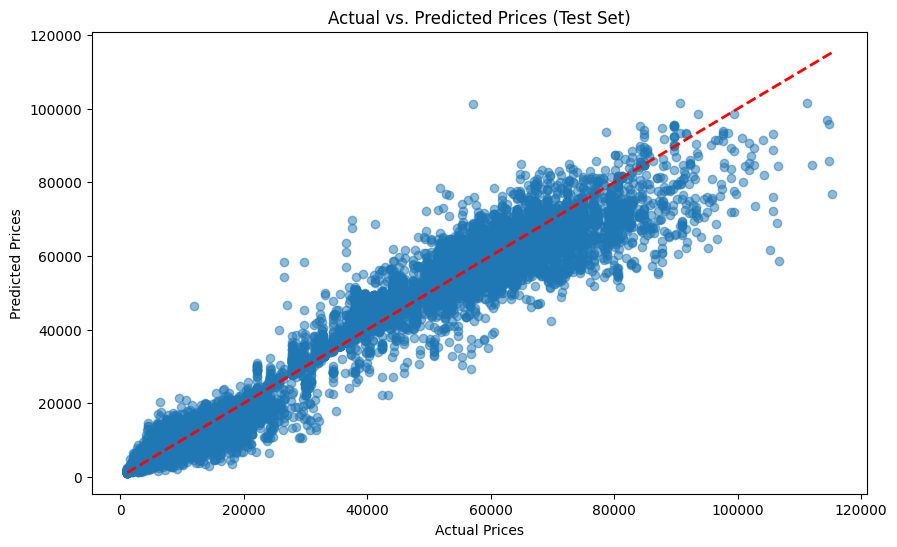

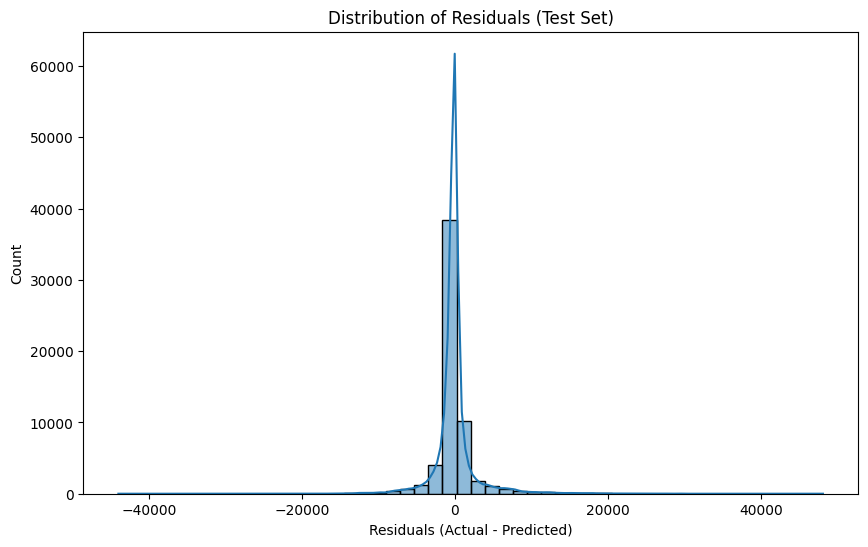

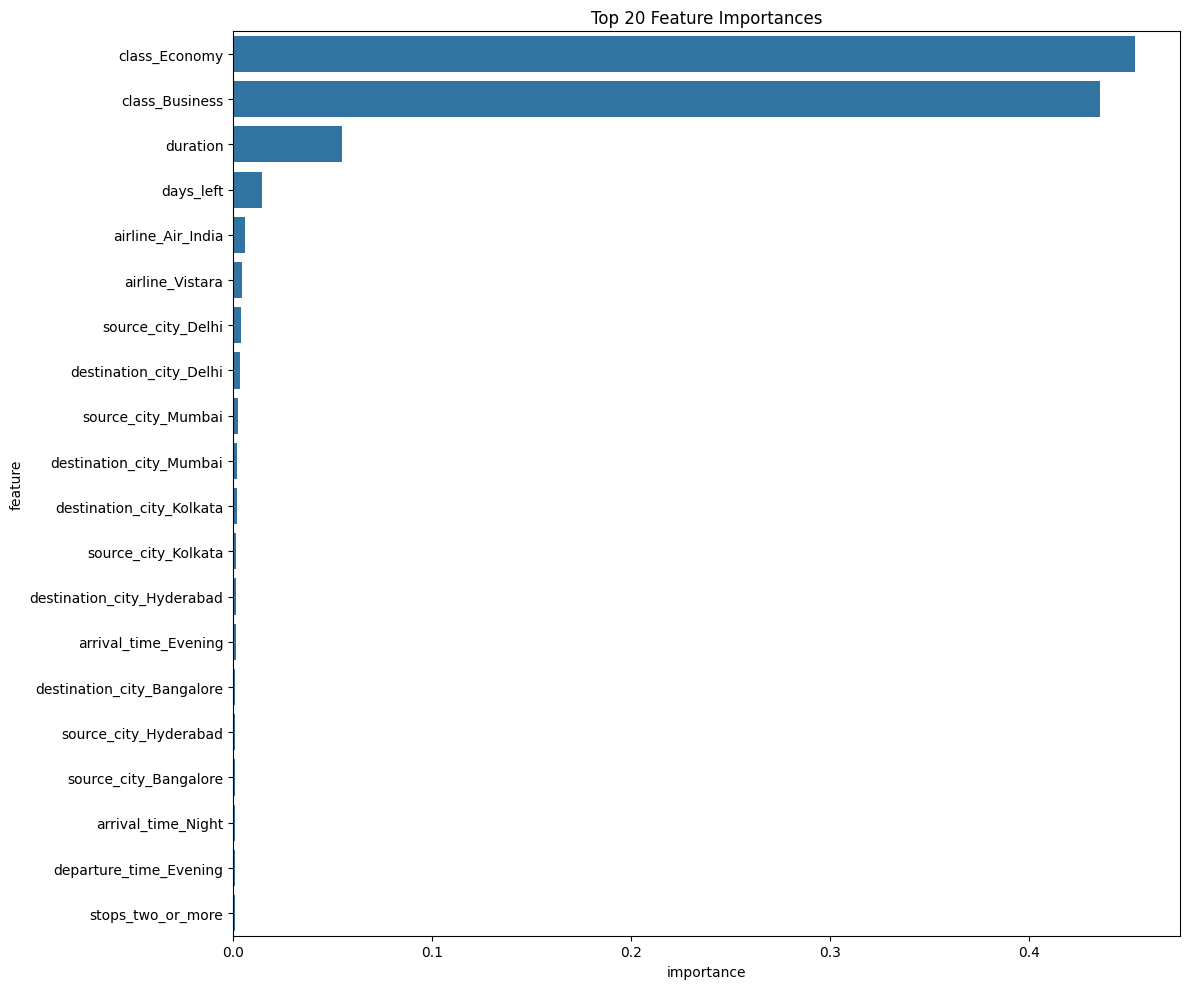

In [25]:
try:
    y_pred_train = rf_pipeline.predict(X_train)
    y_pred_test = rf_pipeline.predict(X_test)

    print("\n--- Training Set Evaluation ---")
    print(f"MAE: {mean_absolute_error(y_train, y_pred_train):.2f}")
    print(f"RMSE: {np.sqrt(mean_squared_error(y_train, y_pred_train)):.2f}")
    print(f"R-squared: {r2_score(y_train, y_pred_train):.4f}")

    print("\n--- Test Set Evaluation ---")
    print(f"MAE: {mean_absolute_error(y_test, y_pred_test):.2f}")
    print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_test)):.2f}")
    print(f"R-squared: {r2_score(y_test, y_pred_test):.4f}")

    plt.figure(figsize=(10, 6))
    plt.scatter(y_test, y_pred_test, alpha=0.5)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', linewidth=2)
    plt.xlabel('Actual Prices')
    plt.ylabel('Predicted Prices')
    plt.title('Actual vs. Predicted Prices (Test Set)')
    plt.show()

    residuals = y_test - y_pred_test
    plt.figure(figsize=(10, 6))
    sns.histplot(residuals, kde=True, bins=50)
    plt.xlabel('Residuals (Actual - Predicted)')
    plt.title('Distribution of Residuals (Test Set)')
    plt.show()

    try:
        cat_transformer = rf_pipeline.named_steps['preprocessor'].transformers_[1][1] if len(rf_pipeline.named_steps['preprocessor'].transformers_) > 1 and rf_pipeline.named_steps['preprocessor'].transformers_[1][0] == 'cat' else None

        feature_names_out = []
        if numerical_cols.tolist():
             feature_names_out.extend(numerical_cols.tolist())
        if cat_transformer is not None and hasattr(cat_transformer, 'get_feature_names_out'):
            feature_names_out.extend(cat_transformer.get_feature_names_out(categorical_cols).tolist())
        elif categorical_cols.tolist():
             print("Warning: Could not retrieve feature names for categorical columns automatically. Using original names.")

        if feature_names_out:
            importances = rf_pipeline.named_steps['regressor'].feature_importances_

            if len(feature_names_out) == len(importances):
                feature_importance_df = pd.DataFrame({'feature': feature_names_out, 'importance': importances})
                feature_importance_df = feature_importance_df.sort_values('importance', ascending=False)

                plt.figure(figsize=(12, 10))
                sns.barplot(x='importance', y='feature', data=feature_importance_df.head(20)) # Show top 20
                plt.title('Top 20 Feature Importances')
                plt.tight_layout()
                plt.show()
            else:
                print(f"\nWarning: Mismatch between number of feature names ({len(feature_names_out)}) and importances ({len(importances)}). Skipping importance plot.")
                print("Feature names identified:", feature_names_out)
        else:
             print("\nWarning: Could not determine feature names for importance plot.")


    except Exception as e:
        print(f"\nError calculating or plotting feature importances: {e}")


except Exception as e:
    print(f"\nError during model evaluation or plotting: {e}")

In [28]:
import joblib

try:
    model_filename = 'ffp_model.joblib'
    joblib.dump(rf_pipeline, model_filename, compress=('zlib', 3))
    print(f"\nModel pipeline saved successfully as {model_filename}")
except Exception as e:
    print(f"\nError saving the model: {e}")


Model pipeline saved successfully as ffp_model.joblib
